In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
%matplotlib inline

In [2]:
allocs = pd.Series([.3, .3, .35, .05, 1], index=['ES','NQ', 'GC', 'CL', 'total'])
#allocs = pd.Series([2/3, 1/3, 1], index=['ES','NQ', 'total'])
cash = 100000

In [3]:
df = pd.read_csv('/home/tomek/ib_tools/blotter/blotter_2020-04-06_10-01.csv')
del df['sys_time']
del df['exec_ids']
try:
    del df['perm_id']
    del df['com_reports']
except:
    pass
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])

In [4]:
df.groupby('contract').realizedPNL.sum()

contract
CL      865.78
ES     5124.80
GC    17241.28
Name: realizedPNL, dtype: float64

In [5]:
df.realizedPNL.sum()

23231.859999999997

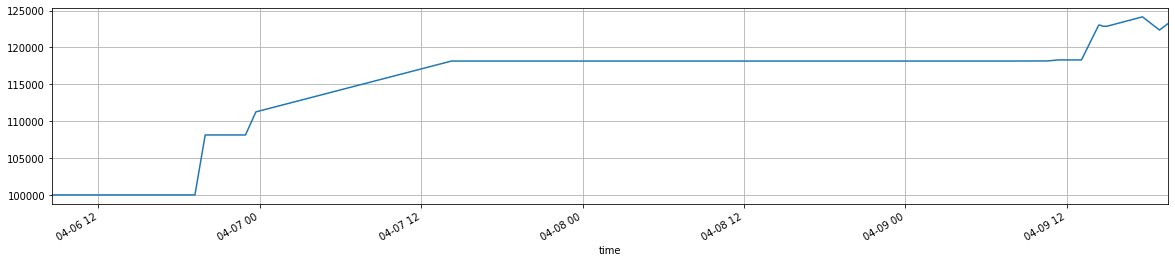

In [6]:
df.cash.plot(figsize=(20,4), grid=True);

In [7]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [8]:
df

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2020-04-06 08:33:02.424795+00:00,GC,BUY,2.0,1663.40,1125,ENTRY,4.84,0.00,100000.00
2020-04-06 19:10:31.240262+00:00,ES,BUY,2.0,2630.00,1162,ENTRY,4.20,0.00,100000.00
2020-04-06 19:56:19.281929+00:00,GC,SELL,2.0,1704.10,1126,STOP-LOSS,4.84,8130.32,108130.32
2020-04-06 22:56:01.950974+00:00,GC,BUY,2.0,1714.90,1318,ENTRY,4.84,0.00,108130.32
2020-04-06 23:42:37.148952+00:00,GC,SELL,2.0,1730.60,1319,STOP-LOSS,4.84,3130.32,111260.64
2020-04-07 14:15:28.201595+00:00,ES,SELL,2.0,2699.00,1163,STOP-LOSS,4.20,6891.60,118152.24
2020-04-08 16:39:31.114810+00:00,ES,BUY,2.0,2717.50,1147,ENTRY,4.20,0.00,118152.24
2020-04-08 22:34:02.360689+00:00,CL,BUY,1.0,26.34,1311,ENTRY,2.37,0.00,118152.24
2020-04-09 07:52:31.338954+00:00,GC,BUY,2.0,1700.20,1334,ENTRY,4.84,0.00,118152.24


In [9]:
df[(df['contract'] == 'GC')]

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2020-04-06 08:33:02.424795+00:00,GC,BUY,2.0,1663.4,1125,ENTRY,4.84,0.00,100000.00
2020-04-06 19:56:19.281929+00:00,GC,SELL,2.0,1704.1,1126,STOP-LOSS,4.84,8130.32,108130.32
2020-04-06 22:56:01.950974+00:00,GC,BUY,2.0,1714.9,1318,ENTRY,4.84,0.00,108130.32
2020-04-06 23:42:37.148952+00:00,GC,SELL,2.0,1730.6,1319,STOP-LOSS,4.84,3130.32,111260.64
2020-04-09 07:52:31.338954+00:00,GC,BUY,2.0,1700.2,1334,ENTRY,4.84,0.00,118152.24
2020-04-09 14:23:18.598560+00:00,GC,SELL,2.0,1723.8,1335,STOP-LOSS,4.84,4710.32,123014.42
2020-04-09 15:00:01.060467+00:00,GC,BUY,2.0,1735.9,1343,ENTRY,4.84,0.00,122869.68
2020-04-09 17:38:02.815234+00:00,GC,SELL,2.0,1742.3,1344,STOP-LOSS,4.84,1270.32,124140.00


In [10]:
# number of trades
trades = df.groupby('contract').action.count()
trades

contract
CL    6
ES    6
GC    8
Name: action, dtype: int64

In [11]:
# commission paid
df.groupby('contract').commission.sum()

contract
CL    14.22
ES    25.20
GC    38.72
Name: commission, dtype: float64

In [12]:
df.commission.sum()

78.14000000000001

In [13]:
# per trade stats
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss','win_ratio', 'EV',
                               'number_of_positions'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    row['average_PNL'] = round(d.realizedPNL.mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0]).realizedPNL.mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0]).realizedPNL.mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_positions'] = d.realizedPNL.count()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV,number_of_positions
GC,1.00,4310.32,4310.32,NaN,NaN,NaN,4.0
ES,0.67,1708.27,3454.10,-1783.40,1.94,1725.73,3.0
CL,0.67,288.59,505.26,-144.74,3.49,290.76,3.0
total,0.80,2323.19,3145.00,-964.07,3.26,2323.19,10.0


In [14]:
daily = by_contract.resample('B').sum()
daily = daily.cumsum() +  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [15]:
# instrument correlations
log_returns = np.log(daily.pct_change()[1:] + 1)
log_returns.corr()

,CL,ES,GC,NQ,total
CL,1.000000,-0.648265,1.000000,NaN,0.225458
ES,-0.648265,1.000000,-0.648265,NaN,0.595655
GC,1.000000,-0.648265,1.000000,NaN,0.225458
NQ,NaN,NaN,NaN,NaN,NaN
total,0.225458,0.595655,0.225458,NaN,1.000000


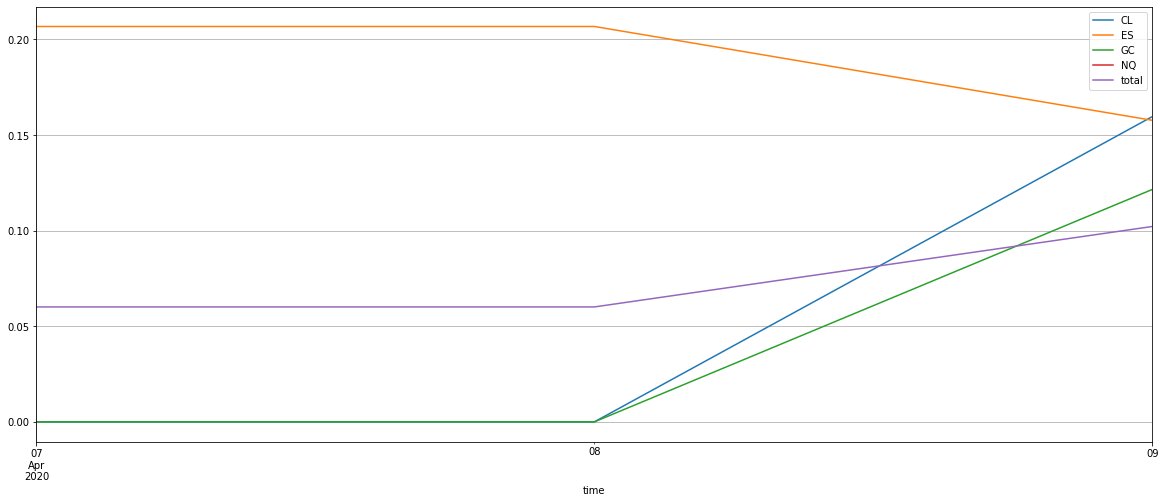

In [16]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

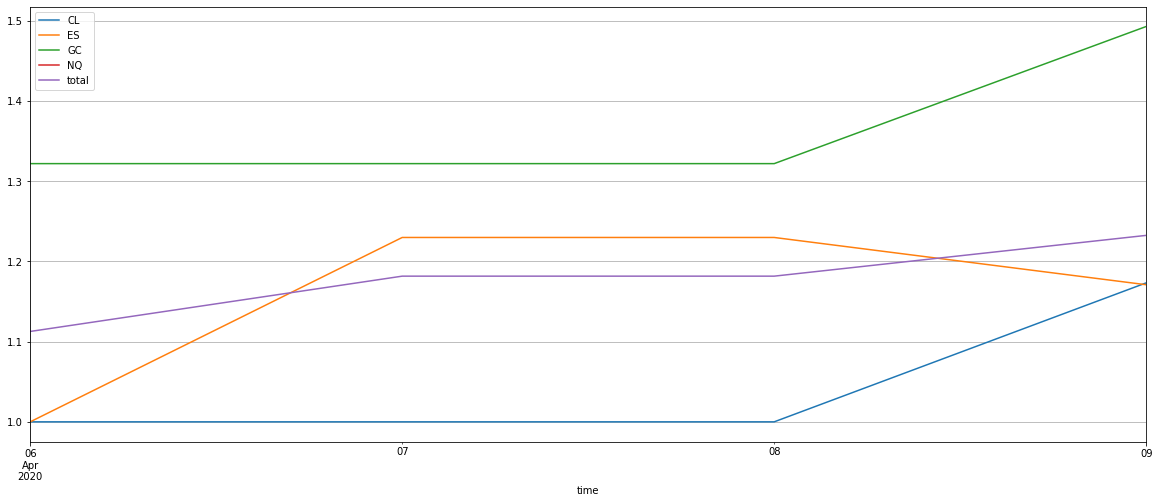

In [17]:
returns = daily.pct_change()
returns.iloc[0] = (daily.iloc[0] / (allocs * cash))-1
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [18]:
stats = pd.DataFrame()
for col in returns.columns:
    stats[col] = perf_stats(returns[col])
stats

ValueError: Inputs must not be empty.

In [ ]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

In [ ]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

In [ ]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]